In [1]:
import sys
import os
Lpath = os.path.abspath('..')
print("found path with os.path.abspath('..'): ", Lpath)
sys.path.insert(0, Lpath)

import numpy as np
import tflearn
import tflearn.activations as activations
# Data loading and preprocessing
from tflearn.activations import relu
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.conv import avg_pool_2d, conv_2d, max_pool_2d
from tflearn.layers.core import dropout, flatten, fully_connected, input_data
from tflearn.layers.merge_ops import merge
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.normalization import batch_normalization


#chris library imports
from matplotlib import pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from test_recursive_image_load_V2 import load_CKP_data
from test_recursive_image_load_V2 import load_formated_data
from test_recursive_image_load_V2 import split_dataset
from test_recursive_image_load_V2 import divide_subjects
from test_recursive_image_load_V2 import divide_data_to_subject
from test_recursive_image_load_V2 import load_npy_files

from showNumpyInfo import showInfo

from Dexpression_network import create_Dexpression_old_network

from confusion_matrix import plot_conf_mat
from confusion_matrix import plot_norm_conf_mat
from confusion_matrix import extract_classes

found path with os.path.abspath('..'):  G:\Documenten\personal\school\MaNaMA_AI\thesis\implementation\dexpression\github_1\github\Thesis_Christiaan_Jean\Custom_Dexpression
hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [3]:
# global Paths to define for each specific computer
#tf_checkpoints = where the checkpoints of tensorflow training algorithms are stored to be recovered if necessary
tf_checkpoints = "G:/Documenten/personal/school/MaNaMA_AI/thesis/implementation/dexpression/github_1/github/Thesis_Christiaan_Jean/Custom_Dexpression/tf_checkpoints"

#load data
# try:
#     X_data = np.load('../data/CKP_X.npy')
#     Y_data = np.load('../data/CKP_Y.npy')
#     X_subID = (np.load('../data/CKP_subjectIds.npy')).astype('uint8')
# except:
#     X_data = np.load('G:/Documenten/personal/school/MaNaMA_AI/thesis/implementation/dexpression/github_1/github/Thesis_Christiaan_Jean/data/CKP_X.npy')
#     Y_data = np.load('G:/Documenten/personal/school/MaNaMA_AI/thesis/implementation/dexpression/github_1/github/Thesis_Christiaan_Jean/data/CKP_Y.npy')
#     X_subID = (np.load('G:/Documenten/personal/school/MaNaMA_AI/thesis/implementation/dexpression/github_1/github/Thesis_Christiaan_Jean/data/CKP_subjectIds.npy')).astype('uint8')
dire = 'CKP'

[X_data,Y_data,X_subID] = load_npy_files(5,dire)

#load the subject distribution over the different datasets
subID = (np.load('../data_division/'+dire+'/train_subject_ID.npy')).astype('uint8')
subID_val = (np.load('../data_division/'+dire+'/validation_subject_ID.npy')).astype('uint8')
subID_test = (np.load('../data_division/'+dire+'/test_subject_ID.npy')).astype('uint8')
subIDs = [subID, subID_val, subID_test]

divided_data = divide_data_to_subject([X_data,Y_data,X_subID],subIDs)
# [X,Y,X_val,Y_val,X_test,Y_test] = divide_data_to_subject([X_data,Y_data,X_subID],subIDs)

# print(X.shape)
# print(X.dtype)

# def format_data(divided_data):
#     X = (divided_data[0].reshape(-1,224,224,1)).astype('uint8')
#     Y = (divided_data[1].reshape(-1,7)).astype('uint8')

#     # create the validation set X_val and Y-val (SubID_val is not given to the network)
#     X_val = divided_data[2].reshape(-1,224,224,1).astype('uint8')
#     Y_val = divided_data[3].reshape(-1,7).astype('uint8')

#     # create the test set X_test and Y_test (SubID_test is not given to the network)
#     X_test = divided_data[4].reshape(-1,224,224,1).astype('uint8')
#     Y_test = divided_data[5].reshape(-1,7).astype('uint8')  
    
#     return [X,Y,X_val,Y_val,X_test,Y_test]

# [X,Y,X_val,Y_val,X_test,Y_test] = format_data(divided_data)
# print(X.shape)
# print(X.dtype)

[WARNING] could not load from path: ./data/CKP 
 because of: [Errno 2] No such file or directory: './data/CKP/X.npy' error
[WARNING] could not load from path: ./../data/CKP 
 because of: [Errno 2] No such file or directory: './../data/CKP/X.npy' error
[SUCCEED]data found in path:  ./../../data/CKP


In [3]:
network = create_Dexpression_old_network()

#create a custom tensorflow session to manage the used resources
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# session = tf.Session(config = config)


# Final definition of model checkpoints and other configurations
#model = tflearn.DNN(network, checkpoint_path='/home/cc/DeXpression/DeXpression_checkpoints',
# model = tflearn.DNN(network, checkpoint_path=tf_checkpoints,
#                     max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir="./tflearn_logs/")


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [4]:
# model.load('./tf_checkpoints/DeXpression_run_3.model')

In [5]:
def create_Y_pred_classes(data,model):
    [X,Y,X_val,Y_val,X_test,Y_test] = data
    # predictions 
    Y_val_pred = model.predict(X_val)  # predictions
    Y_test_pred = model.predict(X_test)  # predictions

    # Y_train_pred_class = extract_classes(model.predict(X))

    Y_train_pred_class = extract_classes(model.predict(X[:50]))
    Y_train_pred_class = np.append(Y_train_pred_class,extract_classes(model.predict(X[50:100])))
    Y_train_pred_class = np.append(Y_train_pred_class,extract_classes(model.predict(X[100:150])))
    Y_train_pred_class = np.append(Y_train_pred_class,extract_classes(model.predict(X[150:200])))
    Y_train_pred_class = np.append(Y_train_pred_class,extract_classes(model.predict(X[200:250])))
    Y_train_pred_class = np.append(Y_train_pred_class,extract_classes(model.predict(X[250:])))

    Y_train_class = extract_classes(Y)

    # extracting classes
    Y_val_pred_class = extract_classes(Y_val_pred)
    Y_val_class = extract_classes(Y_val)

    Y_test_pred_class = extract_classes(Y_test_pred)
    Y_test_class = extract_classes(Y_test)

    print(Y_train_class.astype('uint8'))
    print(Y_train_pred_class.astype('uint8'))
    
    # making full dataset
    Y_pred_class = Y_train_pred_class
    Y_pred_class = np.append(Y_pred_class,Y_val_pred_class)
    Y_pred_class = np.append(Y_pred_class,Y_test_pred_class) 

    Y_class = np.append(Y_train_class,Y_val_class)
    Y_class = np.append(Y_class,Y_test_class)
    
    return [Y_train_class, Y_train_pred_class,
            Y_val_class, Y_val_pred_class, 
            Y_test_class, Y_test_pred_class, 
            Y_class, Y_pred_class   ]

In [6]:
# [Y_train_class, Y_train_pred_class, Y_val_class, Y_val_pred_class, Y_test_class, Y_test_pred_class, Y_class, Y_pred_class   ] = create_Y_pred_classes




In [18]:

#calculate global accuracy
#sum of all correct (top-1) classification divide by the sum off all predictions
# IN:
# Y_class: Np.ndarray (Nx1) correct class labels  
# Y_pred_class: Np.ndarray (Nx1) predicted class labels 
# OUT:
# accuracy value (float64)
def global_acc(Y_class,Y_pred_class,verbose = 0):
    Y_class_corr = np.asarray([]) 
    for i in range(0,Y_pred_class.astype('uint8').shape[0]):
        if(verbose >=2):
            print('Y_class[ ',i,'] ' ,Y_class[i])
            print('Y_pred_class[ ',i,'] ',Y_pred_class[i])
            print(Y_pred_class[i] == Y_class[i])
        if(Y_pred_class[i] == Y_class[i]):
            Y_class_corr = np.append(Y_class_corr,1)
        else:
            Y_class_corr = np.append(Y_class_corr,0)
                        
    Y_pred_class_count = np.bincount(Y_class_corr.astype('uint8'),minlength=2)
    acc = Y_pred_class_count.astype('float64')[1]/(Y_pred_class_count.astype('float64').sum())
    
    if(verbose >=1):
        print(Y_class_corr)
        print(Y_pred_class_count)
        print(acc)
        
    return acc

#TEST

# Y_t_class = np.arange(10)
# print(Y_t_class)
# Y_t_predict = np.asarray([0,1,2,4,4,5,7,7,8,9]) 
# print(Y_t_predict)
# print(global_acc(Y_t_class,Y_t_predict,0))
def display_all_acc(classes,modelID = 'NaN'):
    print("model_",modelID)
    [   Y_train_class, Y_train_pred_class,
                        Y_val_class, Y_val_pred_class, 
                        Y_test_class, Y_test_pred_class, 
                        Y_class, Y_pred_class   ] = classes
    
    
    glob_acc = global_acc(Y_class,Y_pred_class)
    train_acc = global_acc(Y_train_class,Y_train_pred_class)
    val_acc = global_acc(Y_val_class,Y_val_pred_class)
    test_acc = global_acc(Y_test_class,Y_test_pred_class)

    print("train accuracy     : ", train_acc)
    print("validation accuracy: ", val_acc)
    print("test accuracy      : ", test_acc)
    print("global accuracy    : ", glob_acc)
    
# display_all_acc([Y_train_class, Y_train_pred_class, Y_val_class, Y_val_pred_class, Y_test_class, Y_test_pred_class, Y_class, Y_pred_class   ])

In [8]:
def plot_bin_count(Y_class,title = 'no title',size=(20,14)):
    x = ['Anger','Contempt','Disgust','Fear','Happy','Saddness','Surprise']
    y = np.bincount(Y_class.astype('uint8'),minlength=7)
    plt.figure(figsize=size)
    plt.bar(x,y)
    plt.title(title)
    for i, v in enumerate(y):
        plt.text(i - size[0]/160, v  + size[1]/40  , str(v), color='black', fontweight='bold')
    plt.show()

In [24]:
def all_conf_mat(classes,modelID = 'NaN'):
    [   Y_train_class, Y_train_pred_class,
                        Y_val_class, Y_val_pred_class, 
                        Y_test_class, Y_test_pred_class, 
                        Y_class, Y_pred_class   ] = classes
    
    
    
    conf_mat_train = tf.confusion_matrix(Y_train_class,Y_train_pred_class,num_classes=7,dtype=tf.int32)#,# name=None,# weights=None)
    conf_mat_val = tf.confusion_matrix(Y_val_class,Y_val_pred_class,num_classes=7,dtype=tf.int32)#,# name=None,# weights=None)
    conf_mat_test = tf.confusion_matrix(Y_test_class,Y_test_pred_class,num_classes=7,dtype=tf.int32)#,# name=None,# weights=None)
    conf_mat = tf.confusion_matrix(Y_class,Y_pred_class,num_classes=7,dtype=tf.int32)#,# name=None,# weights=None)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    plot_conf_mat(sess.run(conf_mat_train),('training_model_',modelID),(10,7))
    plot_conf_mat(sess.run(conf_mat_val),('validation_model_',modelID),(10,7))
    plot_conf_mat(sess.run(conf_mat_test),('test_model_',modelID),(10,7))
    plot_conf_mat(sess.run(conf_mat),('full_model_',modelID),(10,7))
    
    plot_norm_conf_mat(sess.run(conf_mat_train),('training_normalised_model_',modelID),(10,7))
    plot_bin_count(Y_train_class,('training set class distribution model_',modelID),(10,7))
    
    plot_norm_conf_mat(sess.run(conf_mat_val),('validation_normalised_model_',modelID),(10,7))
    plot_bin_count(Y_val_class,('validation set class distribution',modelID),(10,7))
        
    plot_norm_conf_mat(sess.run(conf_mat_test),('test_normalised_model_',modelID),(10,7))
    plot_bin_count(Y_test_class,('test set class distribution model_',modelID),(10,7))
        
    plot_norm_conf_mat(sess.run(conf_mat),('full_normalised_model_',modelID),(10,7))
    plot_bin_count(Y_class,('full set class distribution model_',modelID),(10,7))
    
  

In [22]:
def full_model_analysis(data,model,modelID = "NaN"):
    classes = create_Y_pred_classes(data,model)
    display_all_acc(classes,modelID)
    all_conf_mat(classes,modelID)

In [11]:
#create a custom tensorflow session to manage the used resources
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config = config)


model1 = tflearn.DNN(network, checkpoint_path=tf_checkpoints,
                    max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir="./tflearn_logs/")
# model3 = tflearn.DNN(network, checkpoint_path=tf_checkpoints,
#                     max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir="./tflearn_logs/")

# model4 = tflearn.DNN(network, checkpoint_path=tf_checkpoints,
#                     max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir="./tflearn_logs/")

# model5 = tflearn.DNN(network, checkpoint_path=tf_checkpoints,
#                     max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir="./tflearn_logs/")



# model1.load('./tf_checkpoints/DeXpression_run_1.model')
# model3.load('./tf_checkpoints/DeXpression_run_3.model')
# model4.load('./tf_checkpoints/DeXpression_run_4.model')
# model5.load('./tf_checkpoints/DeXpression_run_5.model')

In [12]:
tf.RunOptions(report_tensor_allocations_upon_oom = True)
# classes = create_Y_pred_classes(divided_data,model1)
# print(classes[0])
# print(classes[1])

report_tensor_allocations_upon_oom: true

INFO:tensorflow:Restoring parameters from G:\Documenten\personal\school\MaNaMA_AI\thesis\implementation\dexpression\condor_runs\3_29-03-2018\tf_checkpoints\DeXpression_run_1.model
[2 6 0 4 6 5 3 0 2 4 6 5 0 4 6 0 2 6 5 0 4 0 0 6 0 3 2 4 6 0 4 6 2 4 6 0 4
 6 5 0 4 6 4 2 2 0 5 6 3 2 3 6 0 4 6 2 6 4 2 6 4 3 6 2 6 2 0 4 3 2 6 4 6 2
 4 6 0 2 6 3 4 6 2 6 4 2 3 6 4 2 6 4 6 4 5 3 6 4 2 6 4 5 0 6 0 4 2 4 6 3 2
 6 2 6 4 0 6 2 0 3 4 6 0 4 5 4 6 4 6 2 4 5 6 2 4 6 2 4 2 4 6 4 2 6 0 4 6 6
 3 2 2 5 2 4 6 2 5 2 4 0 2 4 6 6 0 2 0 6 5 0 6 4 6 5 4 6 2 4 6 3 0 6 3 0 6
 6 3 2 4 5 4 3 6 2 6 0 6 4 0 1 2 4 6 0 2 4 6 0 5 2 4 6 5 4 2 5 3 2 4 6 0 6
 4 0 4 2 6 4 6 5 0 4 6 5 4 3 6 4 5 1 1 1 1 1 1 1 1 1 1 1]
[2 6 0 4 6 5 3 0 2 4 6 5 0 4 6 0 2 6 5 0 4 0 0 6 0 3 2 4 6 0 4 6 2 4 6 0 4
 6 5 0 4 6 4 2 2 0 5 6 3 2 3 6 0 4 6 2 6 4 2 6 4 3 6 2 6 2 0 4 3 2 6 4 6 2
 4 6 0 2 6 3 4 6 2 6 4 2 3 6 4 2 6 4 6 4 5 3 6 4 2 6 4 5 0 6 0 4 2 4 6 3 2
 6 2 6 4 0 6 2 0 3 4 6 0 4 5 4 6 4 6 2 4 5 6 2 4 6 2 4 2 4 6 4 2 6 0 4 6 6
 3 2 2 5 2 4

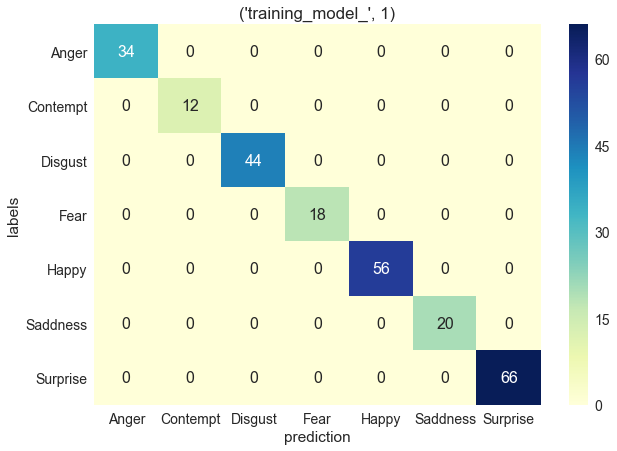

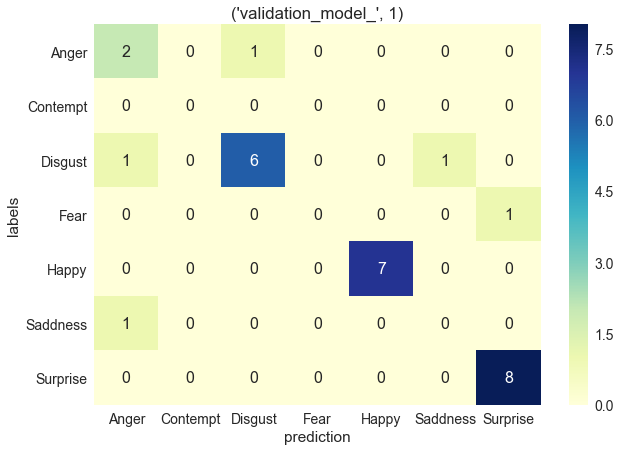

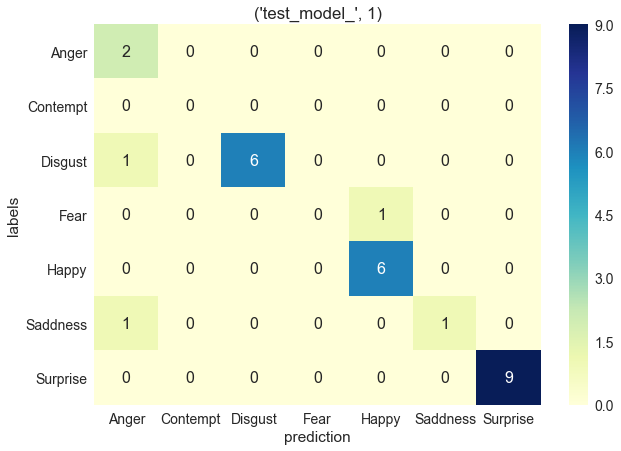

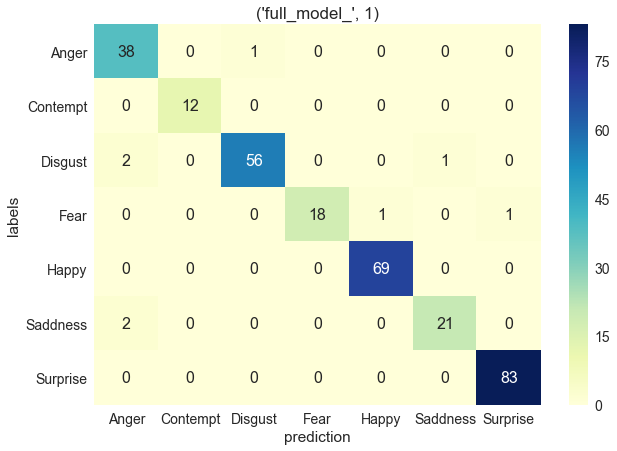

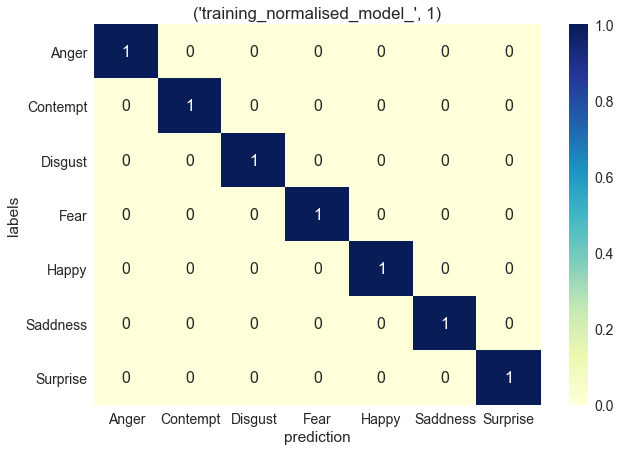

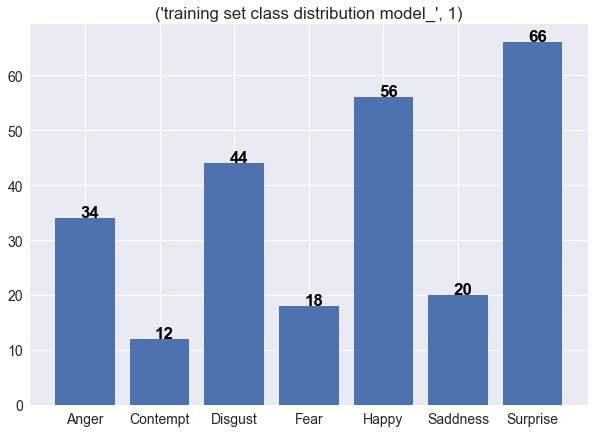

G:\Documenten\personal\school\MaNaMA_AI\thesis\implementation\dexpression\condor_runs\3_29-03-2018\confusion_matrix.py:20: RuntimeWarning: invalid value encountered in true_divide
  conf_mat_norm =np.round(conf_mat.astype(np.float)/sum.reshape(1,7),decimals=4)


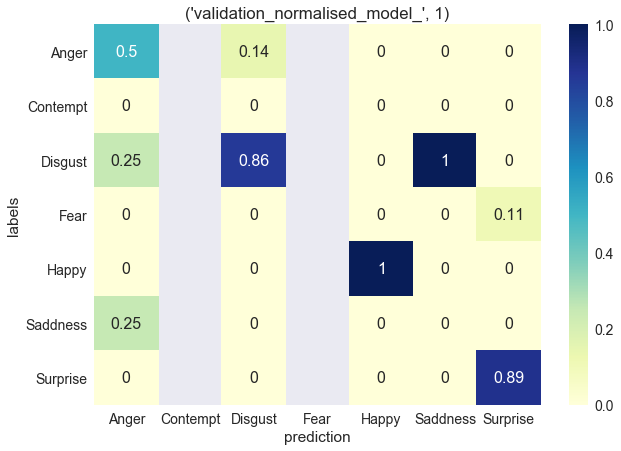

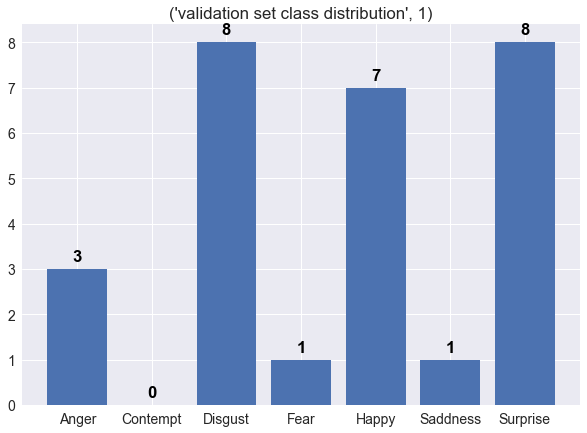

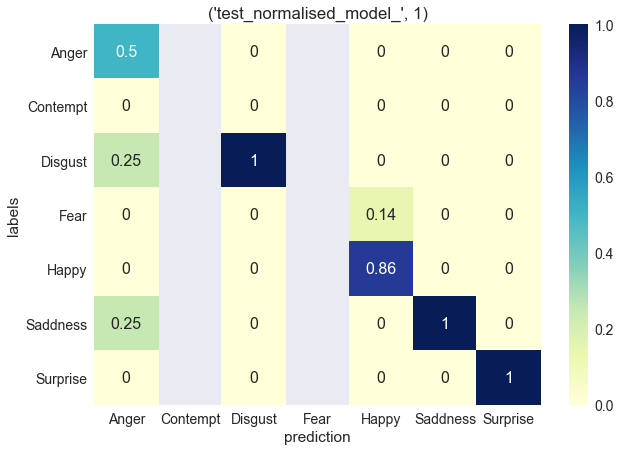

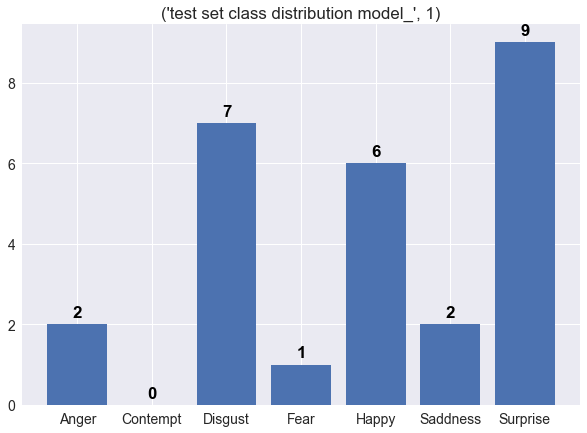

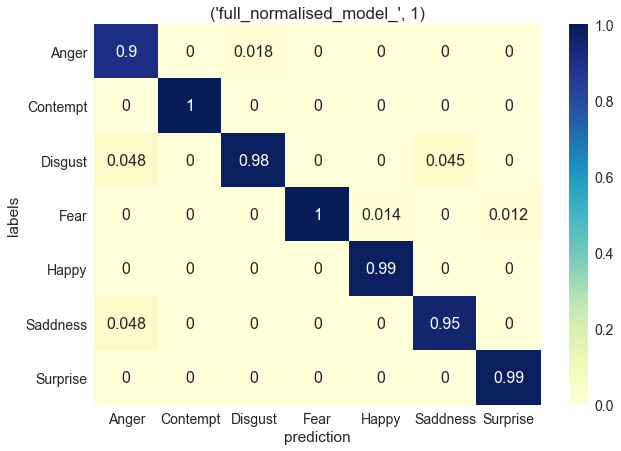

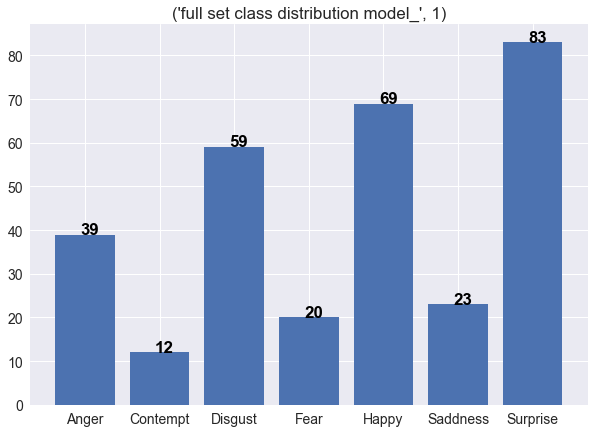

In [25]:
model1.load('../tf_checkpoints/DeXpression_run_1.model')
full_model_analysis(divided_data,model1,1)

INFO:tensorflow:Restoring parameters from G:\Documenten\personal\school\MaNaMA_AI\thesis\implementation\dexpression\condor_runs\3_29-03-2018\tf_checkpoints\DeXpression_run_3.model
[2 6 0 4 6 5 3 0 2 4 6 5 0 4 6 0 2 6 5 0 4 0 0 6 0 3 2 4 6 0 4 6 2 4 6 0 4
 6 5 0 4 6 4 2 2 0 5 6 3 2 3 6 0 4 6 2 6 4 2 6 4 3 6 2 6 2 0 4 3 2 6 4 6 2
 4 6 0 2 6 3 4 6 2 6 4 2 3 6 4 2 6 4 6 4 5 3 6 4 2 6 4 5 0 6 0 4 2 4 6 3 2
 6 2 6 4 0 6 2 0 3 4 6 0 4 5 4 6 4 6 2 4 5 6 2 4 6 2 4 2 4 6 4 2 6 0 4 6 6
 3 2 2 5 2 4 6 2 5 2 4 0 2 4 6 6 0 2 0 6 5 0 6 4 6 5 4 6 2 4 6 3 0 6 3 0 6
 6 3 2 4 5 4 3 6 2 6 0 6 4 0 1 2 4 6 0 2 4 6 0 5 2 4 6 5 4 2 5 3 2 4 6 0 6
 4 0 4 2 6 4 6 5 0 4 6 5 4 3 6 4 5 1 1 1 1 1 1 1 1 1 1 1]
[2 6 0 4 6 5 6 0 2 4 6 5 0 4 6 0 2 6 5 0 4 0 0 6 0 3 2 4 6 0 4 6 2 4 6 0 4
 6 5 0 4 6 4 2 2 0 5 6 4 2 3 6 0 4 6 2 6 4 2 6 4 3 6 2 6 2 0 4 3 2 6 4 6 2
 4 6 0 2 6 4 4 6 2 6 4 2 6 6 4 2 6 4 6 4 5 6 6 4 0 6 4 5 0 6 0 4 2 4 6 2 2
 6 2 6 4 0 6 2 0 3 4 6 0 4 5 4 6 4 6 2 4 5 6 2 4 6 2 4 2 4 6 4 2 6 0 4 6 6
 3 2 2 5 2 4

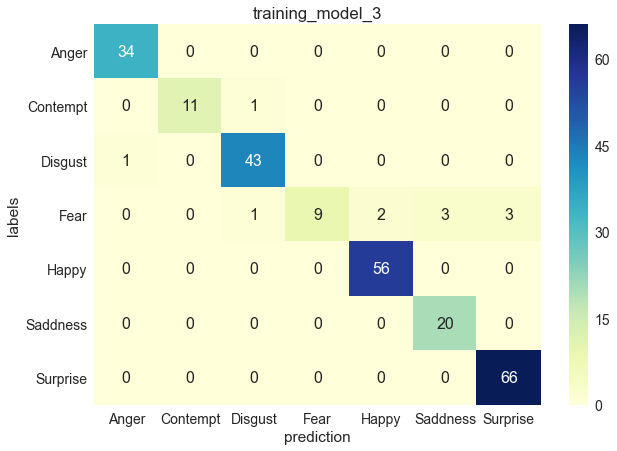

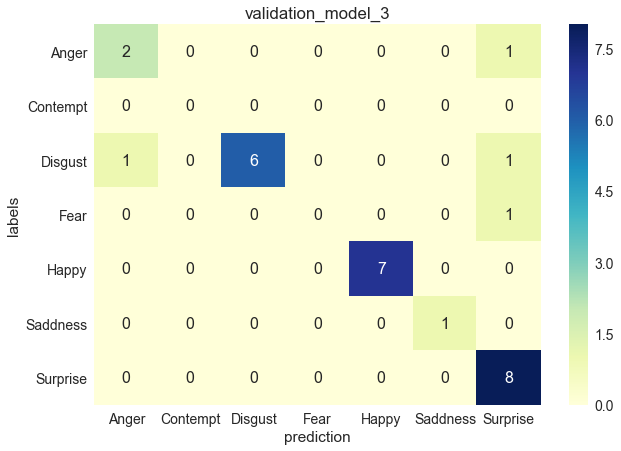

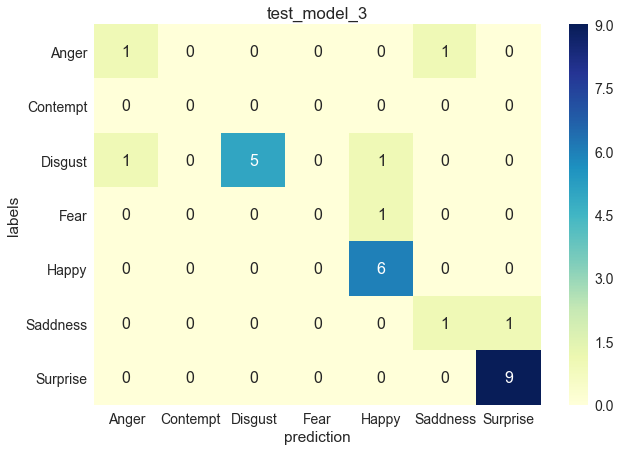

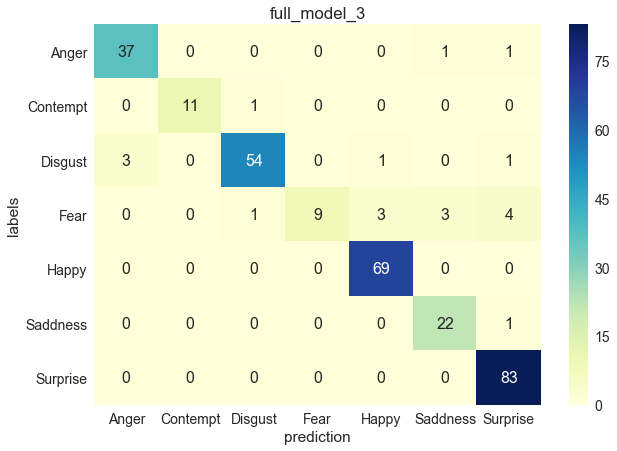

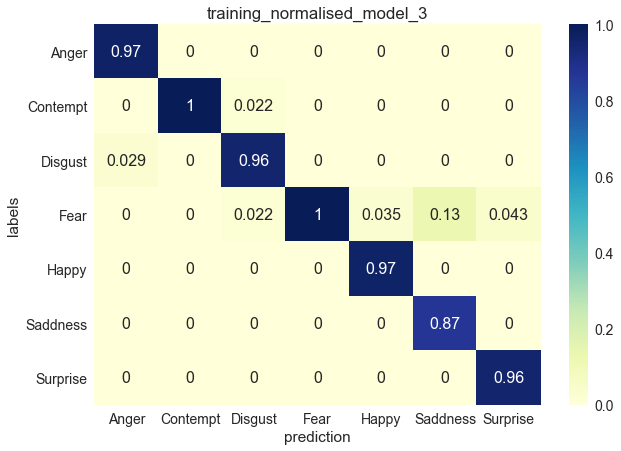

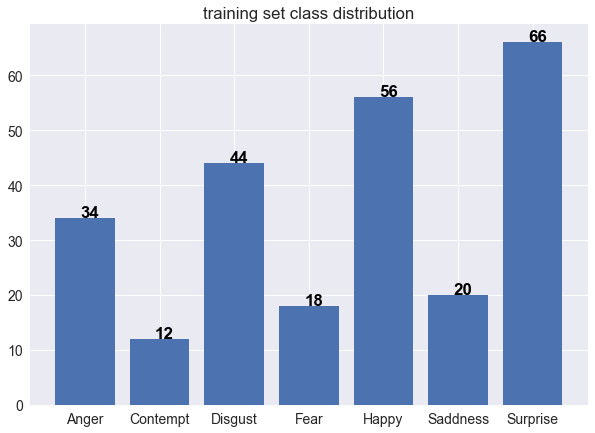

G:\Documenten\personal\school\MaNaMA_AI\thesis\implementation\dexpression\condor_runs\3_29-03-2018\confusion_matrix.py:20: RuntimeWarning: invalid value encountered in true_divide
  conf_mat_norm =np.round(conf_mat.astype(np.float)/sum.reshape(1,7),decimals=4)


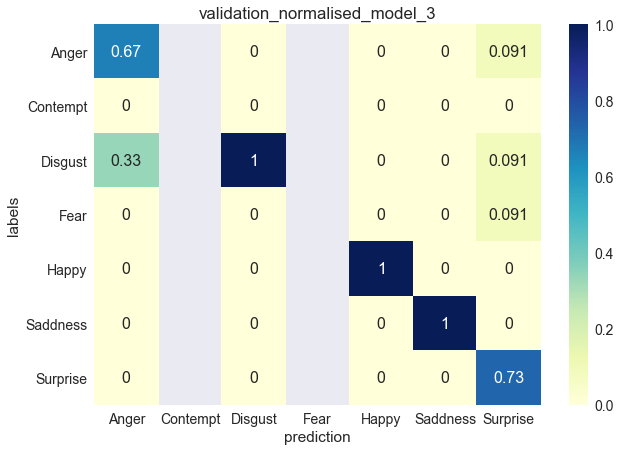

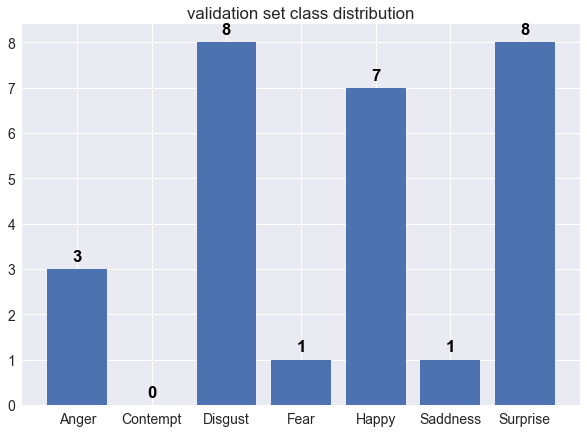

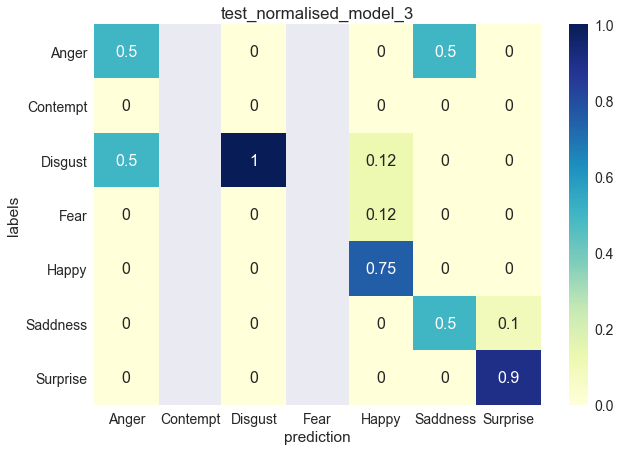

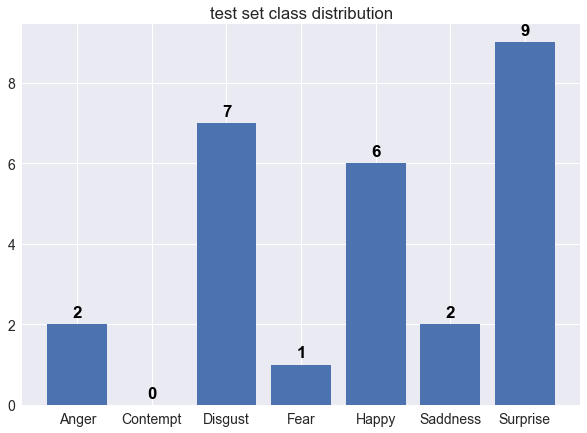

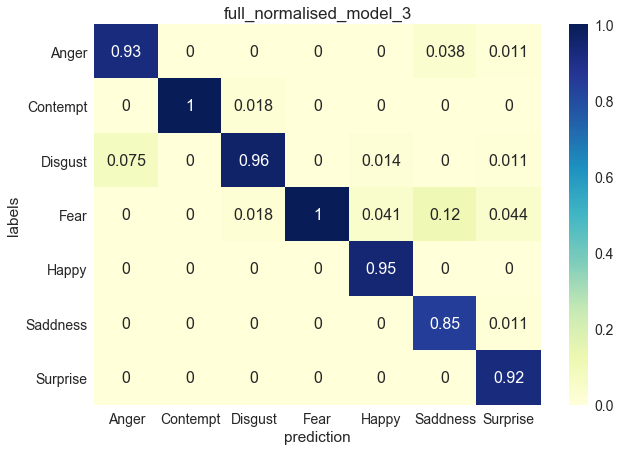

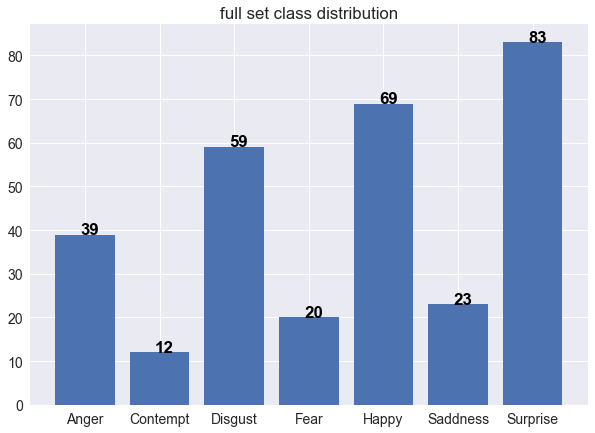

In [14]:
model1.load('../tf_checkpoints/DeXpression_run_3.model')
full_model_analysis(divided_data,model1,3)

INFO:tensorflow:Restoring parameters from G:\Documenten\personal\school\MaNaMA_AI\thesis\implementation\dexpression\condor_runs\3_29-03-2018\tf_checkpoints\DeXpression_run_4.model
[2 6 0 4 6 5 3 0 2 4 6 5 0 4 6 0 2 6 5 0 4 0 0 6 0 3 2 4 6 0 4 6 2 4 6 0 4
 6 5 0 4 6 4 2 2 0 5 6 3 2 3 6 0 4 6 2 6 4 2 6 4 3 6 2 6 2 0 4 3 2 6 4 6 2
 4 6 0 2 6 3 4 6 2 6 4 2 3 6 4 2 6 4 6 4 5 3 6 4 2 6 4 5 0 6 0 4 2 4 6 3 2
 6 2 6 4 0 6 2 0 3 4 6 0 4 5 4 6 4 6 2 4 5 6 2 4 6 2 4 2 4 6 4 2 6 0 4 6 6
 3 2 2 5 2 4 6 2 5 2 4 0 2 4 6 6 0 2 0 6 5 0 6 4 6 5 4 6 2 4 6 3 0 6 3 0 6
 6 3 2 4 5 4 3 6 2 6 0 6 4 0 1 2 4 6 0 2 4 6 0 5 2 4 6 5 4 2 5 3 2 4 6 0 6
 4 0 4 2 6 4 6 5 0 4 6 5 4 3 6 4 5 1 1 1 1 1 1 1 1 1 1 1]
[2 6 0 4 6 5 3 0 2 4 6 5 0 4 6 0 2 6 5 0 4 0 0 6 0 3 2 4 6 0 4 6 2 4 6 0 4
 6 5 0 4 6 4 2 2 0 5 6 3 2 3 6 0 4 6 2 6 4 2 6 4 3 6 2 6 2 0 4 3 2 6 4 6 2
 4 6 0 2 6 3 4 6 2 6 4 2 3 6 4 2 6 4 6 4 5 3 6 4 2 6 4 5 0 6 0 4 2 3 6 3 2
 6 2 6 4 0 6 2 0 3 4 6 0 4 5 4 6 4 6 2 4 5 6 2 4 6 2 4 2 4 6 4 2 6 0 4 6 6
 3 2 2 5 2 4

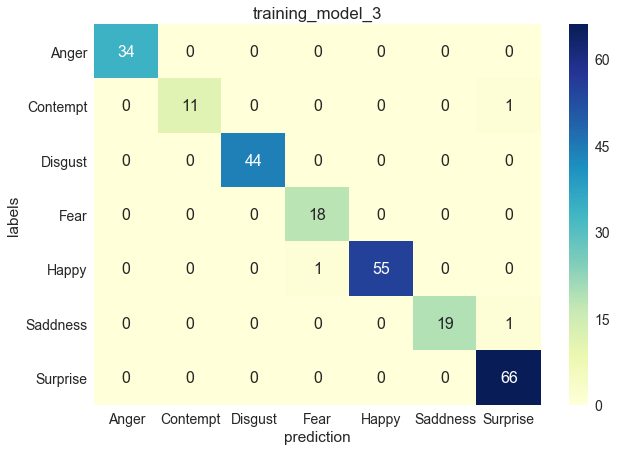

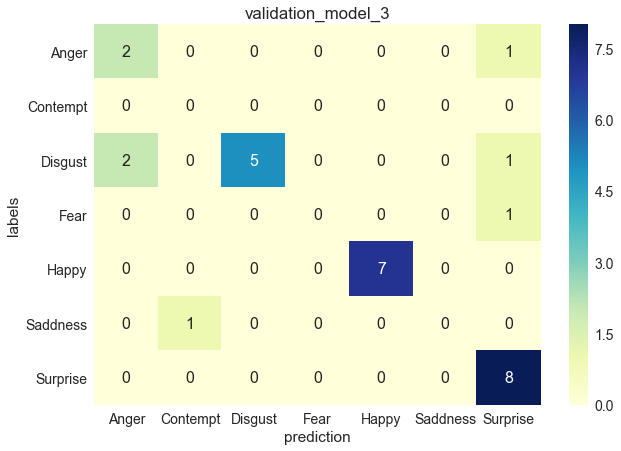

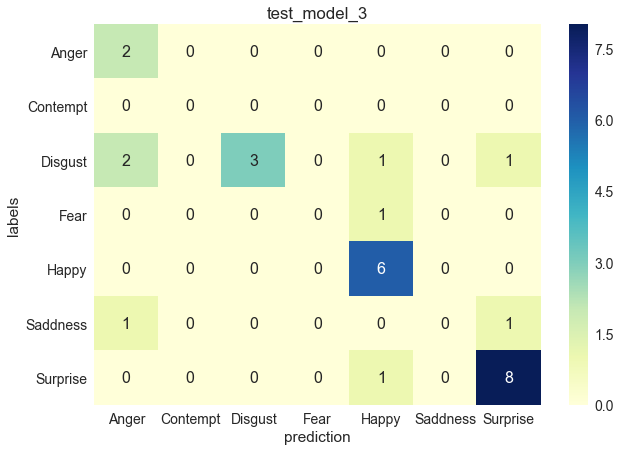

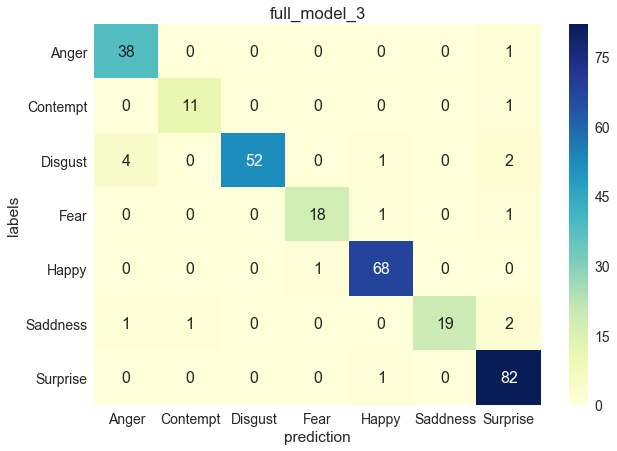

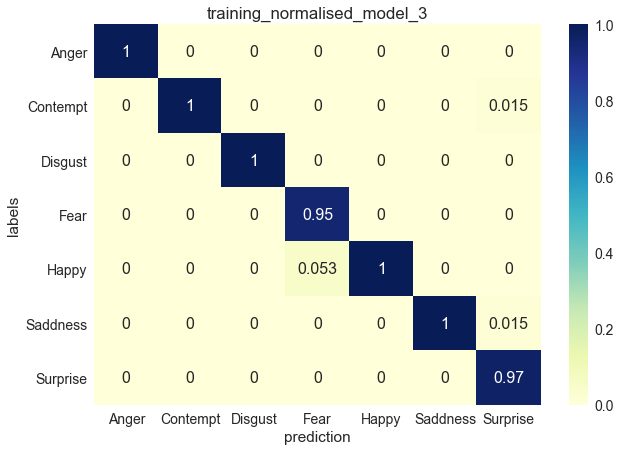

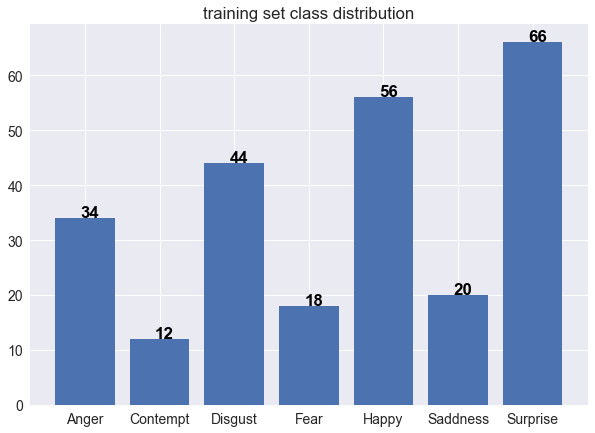

G:\Documenten\personal\school\MaNaMA_AI\thesis\implementation\dexpression\condor_runs\3_29-03-2018\confusion_matrix.py:20: RuntimeWarning: invalid value encountered in true_divide
  conf_mat_norm =np.round(conf_mat.astype(np.float)/sum.reshape(1,7),decimals=4)


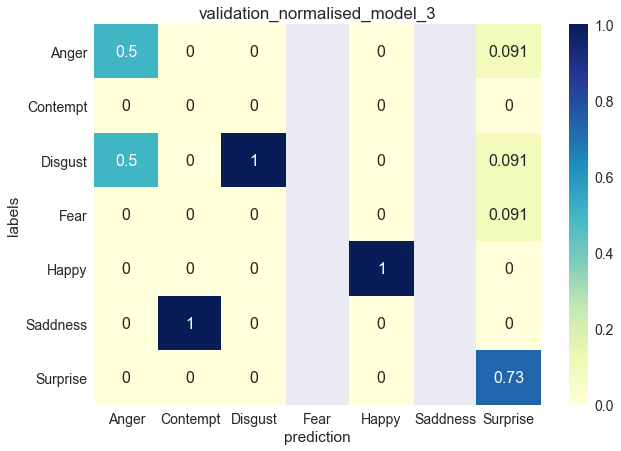

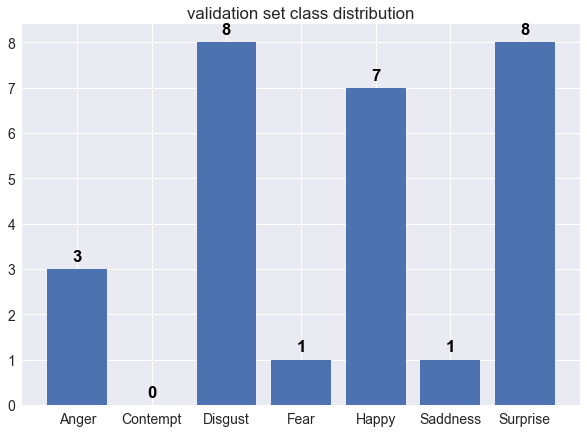

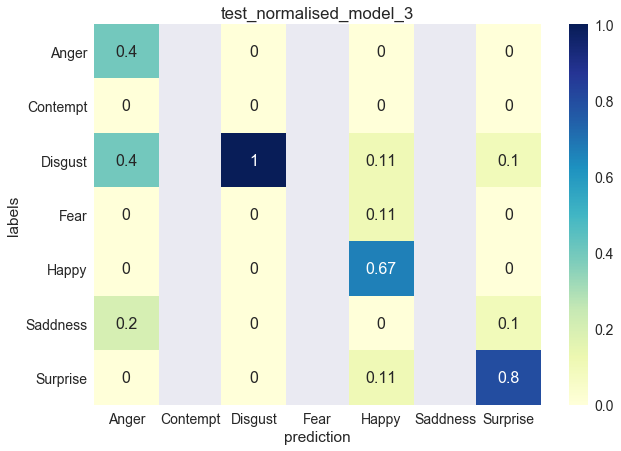

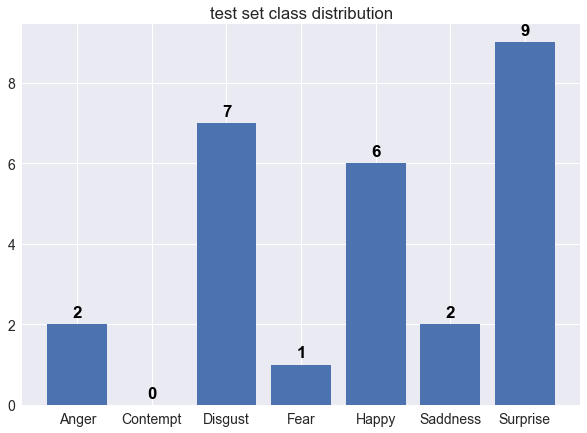

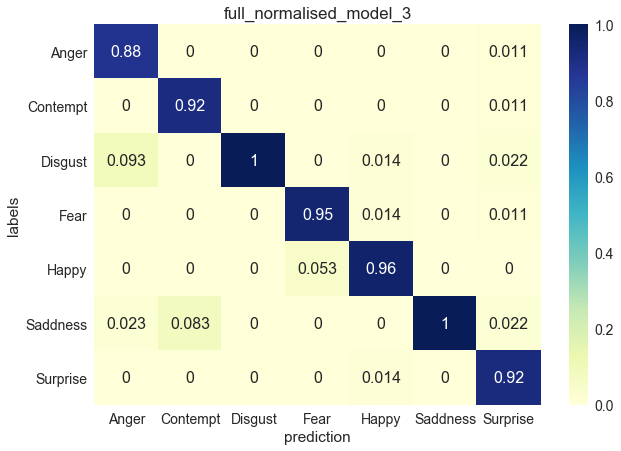

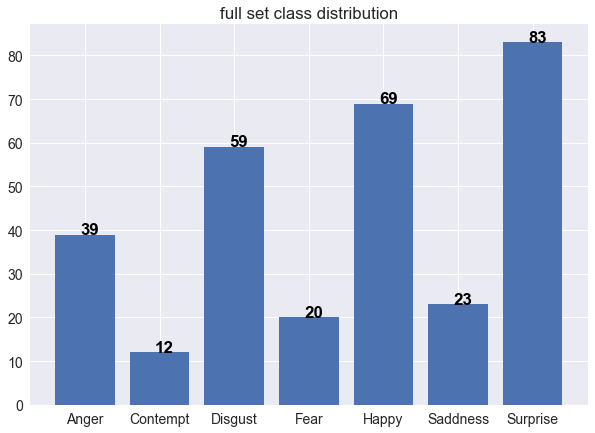

In [15]:
model1.load('../tf_checkpoints/DeXpression_run_4.model')
full_model_analysis(divided_data,model1,4)

INFO:tensorflow:Restoring parameters from G:\Documenten\personal\school\MaNaMA_AI\thesis\implementation\dexpression\condor_runs\3_29-03-2018\tf_checkpoints\DeXpression_run_5.model
[2 6 0 4 6 5 3 0 2 4 6 5 0 4 6 0 2 6 5 0 4 0 0 6 0 3 2 4 6 0 4 6 2 4 6 0 4
 6 5 0 4 6 4 2 2 0 5 6 3 2 3 6 0 4 6 2 6 4 2 6 4 3 6 2 6 2 0 4 3 2 6 4 6 2
 4 6 0 2 6 3 4 6 2 6 4 2 3 6 4 2 6 4 6 4 5 3 6 4 2 6 4 5 0 6 0 4 2 4 6 3 2
 6 2 6 4 0 6 2 0 3 4 6 0 4 5 4 6 4 6 2 4 5 6 2 4 6 2 4 2 4 6 4 2 6 0 4 6 6
 3 2 2 5 2 4 6 2 5 2 4 0 2 4 6 6 0 2 0 6 5 0 6 4 6 5 4 6 2 4 6 3 0 6 3 0 6
 6 3 2 4 5 4 3 6 2 6 0 6 4 0 1 2 4 6 0 2 4 6 0 5 2 4 6 5 4 2 5 3 2 4 6 0 6
 4 0 4 2 6 4 6 5 0 4 6 5 4 3 6 4 5 1 1 1 1 1 1 1 1 1 1 1]
[2 6 0 4 6 6 3 0 2 4 6 0 0 4 6 0 2 6 4 0 4 0 0 6 0 3 2 4 6 0 4 6 2 4 6 0 4
 6 6 0 4 6 4 2 2 0 2 6 3 2 3 6 0 4 6 2 6 4 2 6 4 3 6 2 6 2 0 4 3 2 6 4 6 2
 4 6 0 2 6 3 4 6 2 6 4 2 3 6 4 2 6 4 6 4 1 3 6 4 2 6 4 0 0 6 0 4 6 4 6 3 2
 6 2 6 4 0 6 2 0 3 4 6 0 4 6 4 6 4 6 2 4 5 6 2 4 6 2 4 2 4 6 4 2 6 0 4 6 6
 3 2 2 0 2 4

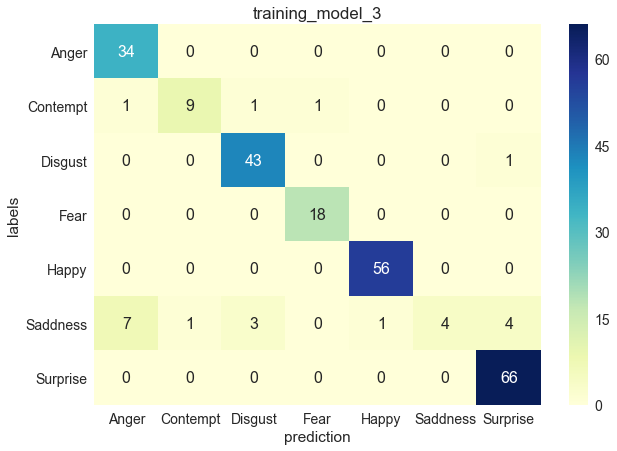

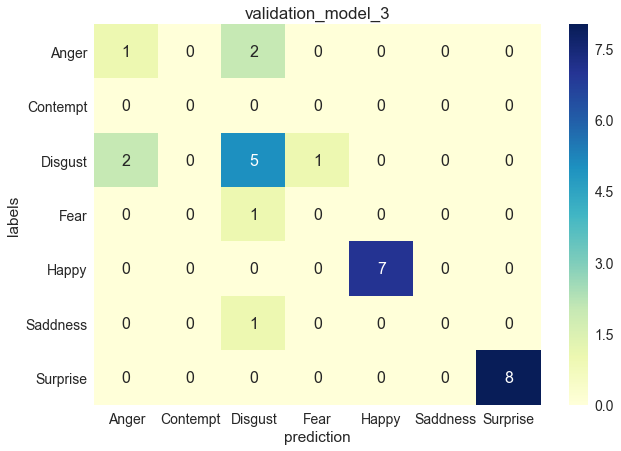

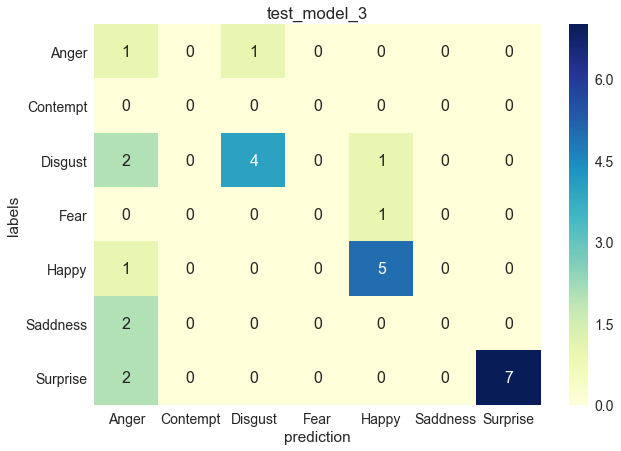

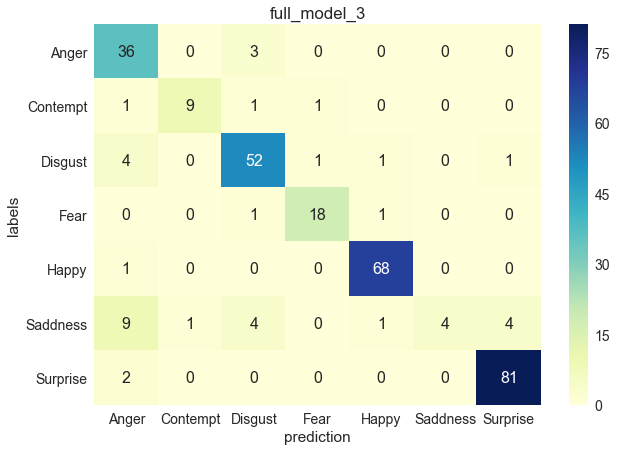

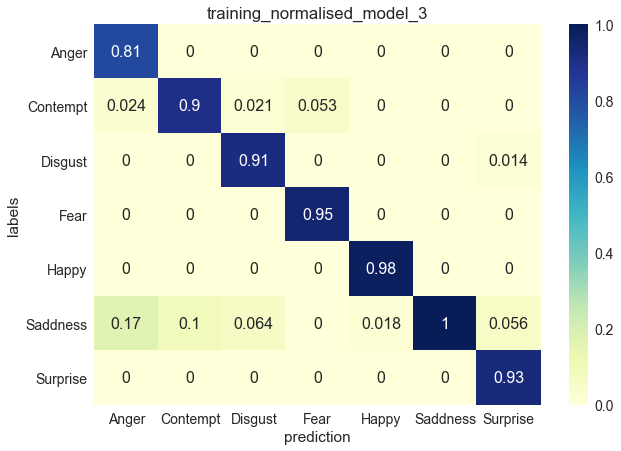

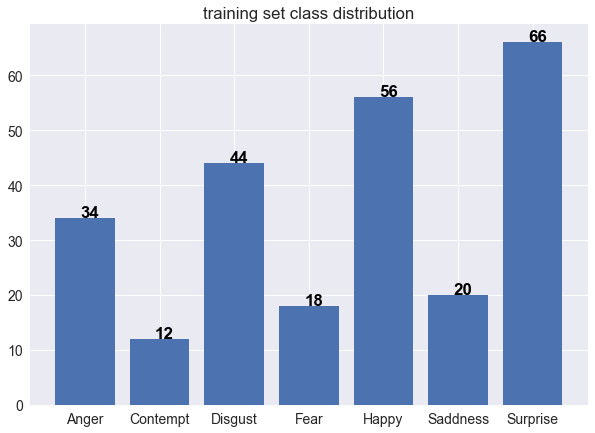

G:\Documenten\personal\school\MaNaMA_AI\thesis\implementation\dexpression\condor_runs\3_29-03-2018\confusion_matrix.py:20: RuntimeWarning: invalid value encountered in true_divide
  conf_mat_norm =np.round(conf_mat.astype(np.float)/sum.reshape(1,7),decimals=4)


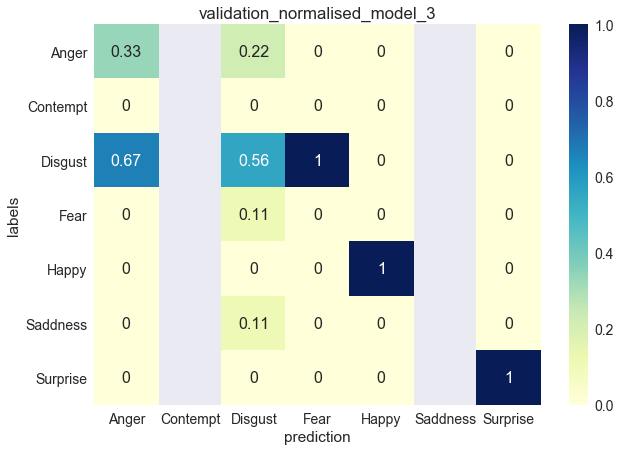

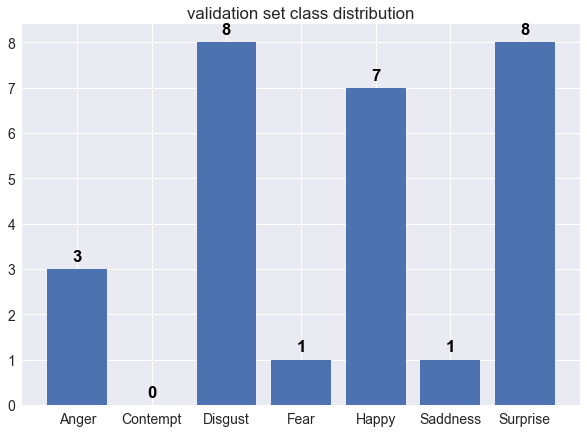

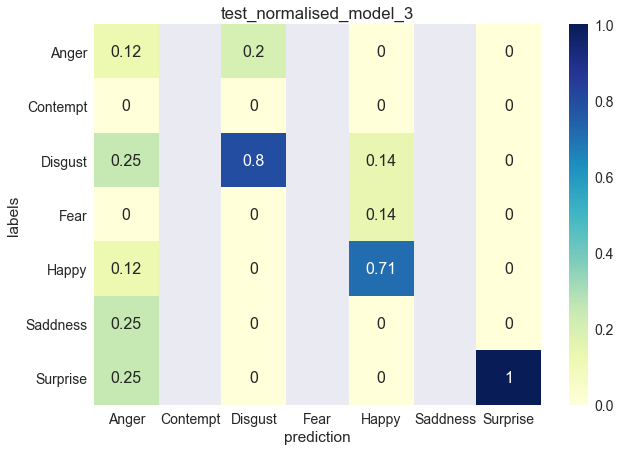

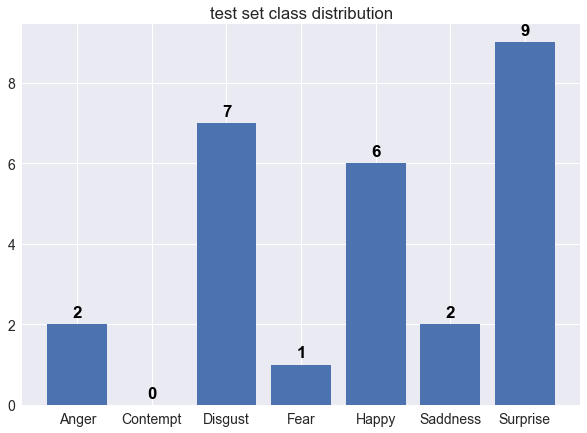

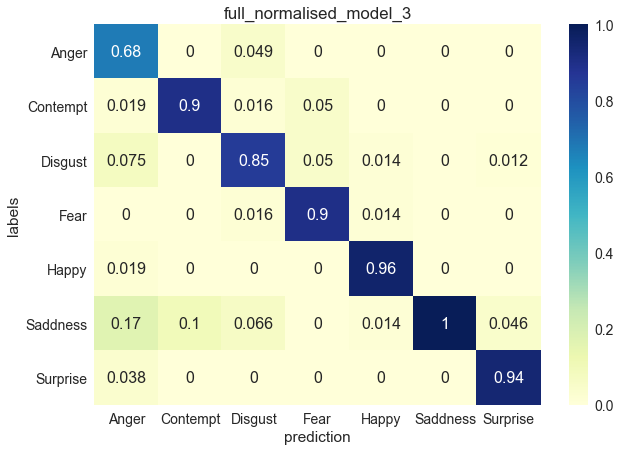

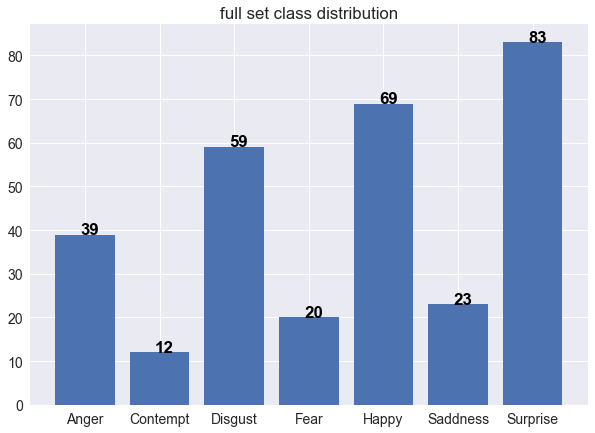

In [16]:
model1.load('../tf_checkpoints/DeXpression_run_5.model')
full_model_analysis(divided_data,model1,5)

In [17]:
# full_model_analysis(divided_data,model)

